In [1]:
import pandas as pd
import sklearn 

In [30]:
df_wine = pd.read_csv('Wine.csv', header = None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### First, standarizing the data

In [32]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [33]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Then, get the covariance matrix

In [6]:
import numpy as np

In [7]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues  \n%s' %eigen_vals)

Eigenvalues  
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


#### Plotting the 'variance explained ratios'

In [8]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [9]:
import matplotlib.pyplot as plt

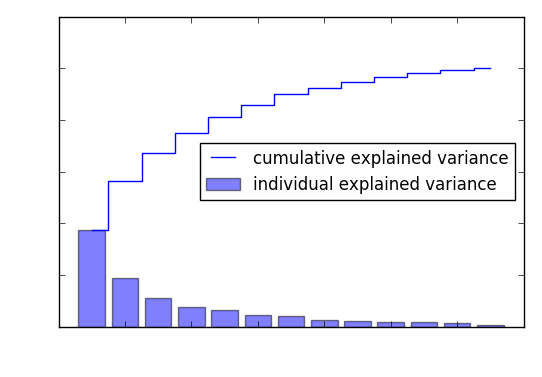

In [10]:
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio', color='white')
plt.xlabel('Principal components', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(loc='best')
plt.show()

In [11]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k : k[0], reverse=True)

In [12]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


#### Transforming the data from 13x1 dimension (original)  to 2x1 dimension (PC)

In [13]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [14]:
X_train_pca = X_train_std.dot(w)

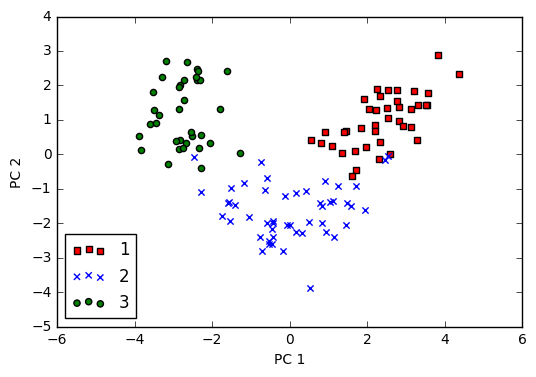

In [15]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l, 1], c=c, label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [17]:
w3 = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis]))

In [18]:
X_train_pca3 = X_train_std.dot(w3)

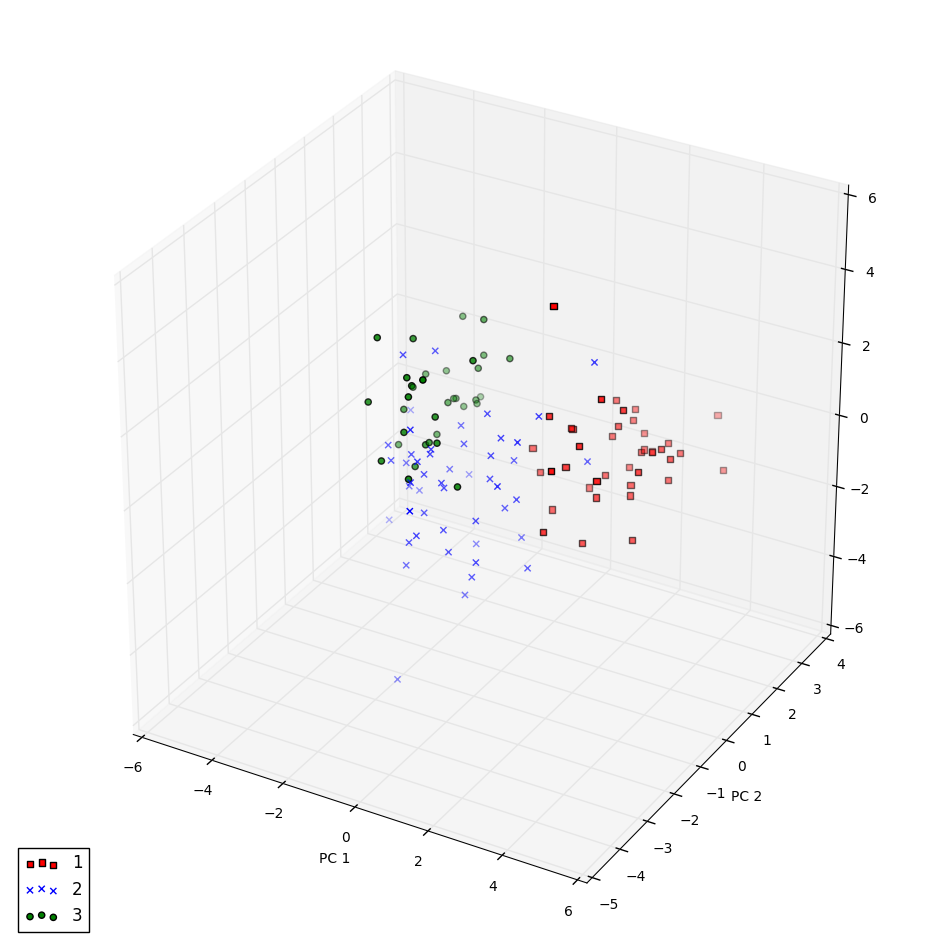

In [19]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot(111, projection='3d')
for l,c,m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca3[y_train==l,0],X_train_pca3[y_train==l, 1],X_train_pca3[y_train==l, 2], c=c, label=l, marker=m,zdir = 'z' )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

# Using Scikit Learn

In [20]:
from matplotlib.colors import ListedColormap

In [38]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min() -1, X[:,0].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha = 0.8, c=cmap(idx), marker = markers[idx], label=cl)

        

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

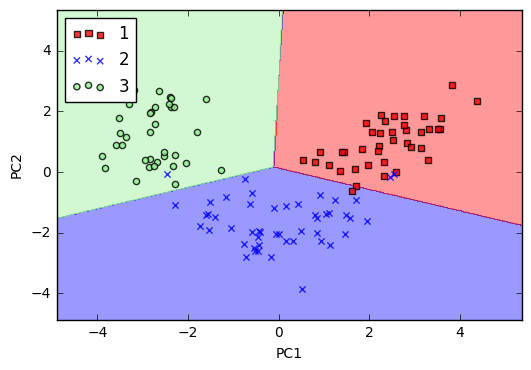

In [64]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_train_pca = [1,-1]*X_train_pca
#originally x_test_pca is the reversed on Y axis
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.show()

In [66]:
X_test_pca = [1,-1]*X_test_pca
#originally x_test_pca is the reversed on Y axis

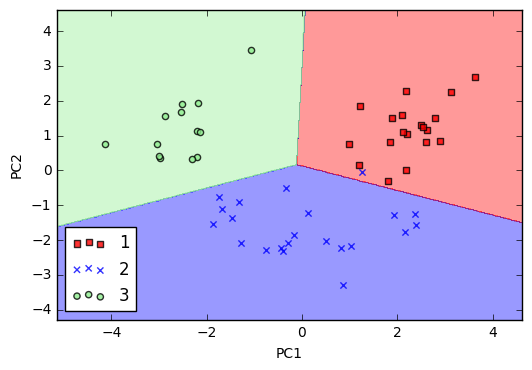

In [67]:
plot_decision_regions(X_test_pca,y_test,lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [52]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
#this shows the PCA sorted

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])